# Introduction -- Reminder

Each Python lab will start with a pre-flight exercise that walks through building some of the set up and tools ($\sim$ 30 min), followed by an in-class tutorial with time for Q+A (50 min) so you can walk through steps that will be necessary for the homework assignment you will submit ($\sim$ 3 hrs).  Each lab will contain starter code, similar to what you see below.  Please fill in the code to complete the pre-flight assignment in preparation for the in-class tutorial.  

Preflight ($\sim$30-60 min, 10 points) **Typically due: Wednesdays 3pm EST**

*Preflight typically graded by Wednesday 5p EST*

In-class tutorial and Q+A ($\sim$ 50 min, 10 points) **Typically occurs: Thursdays 9am EST**

Homework assignment ($\sim$ 3-5 hrs, 30 points) **Typically due: Mondays 9am EST** 

*Homework typically graded by Thursday 5p*

When we grade your homework, we will not run your code. Once submitted, your notebook should have the outputs for all of your results.  Please do not include long outputs from debugging, beyond a few print statements and the requested visualizations (i.e. plots).

**Grading:** When we grade your notebook, we will convert the .ipynb file to an HTML file.  We will be using [nbgrader](https://nbgrader.readthedocs.io/en/stable/) to grade your notebooks.  **Note:** If your ```IPython``` version is too old, we will *not* be able to grade your assignments.




# Phys 260 Python Tutorial/HW 7: Simulating charged particles in fields (30 points total)

## Tutorial Summary
- Creating and using your own python module
- Replicate what you did in the preflight with less code in `__main__`
- The Runge-Kutta Method and effect on kinetic energy

## HW Summary
- How changes in the field affect the particle trajectory
- Simulating a velocity filter
- Comparisons of the energy budget using the Runge-Kutta Method

In [1]:
import numpy as np
from matplotlib import pyplot as plt

### Import modules in your path

You can access any python libraries/modules in your "path".  You can see what is in your path below.  One of the things in your path will always be the "working directory".

First, we import the `sys` [module](https://docs.python.org/3/library/sys.html), which contains system-specific parameters and functions.  This module contains a list of all directories in your path, which you can access as `sys.path`.

In [2]:
import sys
print(sys)
print(type(sys.path))
print(sys.path)

<module 'sys' (built-in)>
<class 'list'>
['/home/avestruz/Repos/2020FAPhys260/source/ps7', '/home/avestruz/anaconda3/envs/nbgrader/lib/python38.zip', '/home/avestruz/anaconda3/envs/nbgrader/lib/python3.8', '/home/avestruz/anaconda3/envs/nbgrader/lib/python3.8/lib-dynload', '', '/home/avestruz/anaconda3/envs/nbgrader/lib/python3.8/site-packages', '/home/avestruz/anaconda3/envs/nbgrader/lib/python3.8/site-packages/IPython/extensions', '/home/avestruz/.ipython']


One can run simple [`bash` commands](https://en.wikipedia.org/wiki/Bash_(Unix_shell)) from the jupyter notebook and python interpreter (a line-by-line version of python notebooks).  Briefly, `bash` is a command line language often used for file management.  Below, we `ls`, or list, the contents of our current working directory.

In [3]:
ls

charge_particle_in_fields.py     electric_and_magnetic_fields.py~
charge_particle_in_fields.py~    __pycache__/
electric_and_magnetic_fields.py  tutorialhw7.ipynb


You will see that we have the python modules, `charge_particle_in_fields` and `electric_and_magnetic_fields`.  Python modules are \<module name\>.py  

**In class** (2 points -- 1 minute):  In the cell below, import these modules with aliases `cp` and `eb_methods`, respectively.

In [4]:
# import the modules 
### BEGIN SOLUTION
import charge_particle_in_fields as cp
import electric_and_magnetic_fields as eb_methods
### END SOLUTION

In [5]:
assert(id(cp))
assert(id(eb_methods))

### Examine module contents (2 points -- 5 minutes in groups)

Below, we examine the module contents using the built-in `help` function.  List what classes and/or functions, etc. you find in the module `cp`, and what you find in the module `eb_methods`.

- `cp` contains the class, ChargedParticle, and the functions `calc_acceleration_of_charge_in_ebfields`,  `get_rates_of_change_euler`, `calc_force_on_charge_by_bfield`, and `calc_force_on_charge_by_efield`.
- `eb_methods` contains the functions `constant_electric_field`, `constant_magnetic_field`, and `linearly_increasing_bfield`.

In [6]:
# Use this cell for executing help on the newly imported modules.
help(cp.ChargedParticle)

Help on class ChargedParticle in module charge_particle_in_fields:

class ChargedParticle(builtins.object)
 |  ChargedParticle(mass, charge, x0, v0, efield_method, bfield_method)
 |  
 |  Creates an instance of a charged particle, which can be time evolved
 |  Parameters
 |  ----------
 |  mass : float
 |      mass of particle.  default 1
 |  charge : float
 |      charge of particle in Coulombs. default 1
 |  x0 : nd-array
 |      initial position of mass. default np.array([0,0,0])
 |  v0 : float
 |      initial velocity of mass. default np.array([0,0,0])
 |  efield_method : func
 |      function to calculate electric field for a charged particle at a given position
 |  bfield_method : func
 |      function to calculate magnetic field for a charged particle at a given position and velocity
 |  
 |  Methods defined here:
 |  
 |  __init__(self, mass, charge, x0, v0, efield_method, bfield_method)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  evolve_part

### Take 2 minutes to make sure your uniqname is in both modules

Use a text editor to view the module files (start with charge_particle_in_fields.py).  You'll notice that the docstrings of both modules contain a line that looks like:
```
"UNIQNAME = \"cavestru\"\n   
```

Keep EVERYTHING ELSE, but replace "cavestru" with your own uniqname.  This correctly filled out line is necessary to make sure your submitted assignment files stay together.

### Use the objects from the modules to do what you did in the preflight (5 points -- 5 minutes in groups)

Recall, in the preflight, you had to create an instance of `ChargedParticle`, time evolve the object with the method `evolve_particle`, then plot.  In the cell below, you will do the same but use the objects already defined in the modules you have imported.  

- First, define an instance of the `ChargedParticle` class with name `charged_particle`.  Remember that when you use `numpy` tools, you needed the alias `np` as a prefix for all tools.  Similarly, you will need either `cp` or `eb_methods` as a prefix.  Also, you will need to specify all parameters to the `ChargedParticle` class (see documentation for the class using help), including `x0`, `v0`, `efield_method`, and `bfield_method`. Take the initial position and velocity to be the origin and (0,0,0).  Use the `constant_electric_field` and `constant_magnetic_field` as your input methods.
- Next, evolve the object for 1000 timesteps with `dt` of 0.01.  Note, you'll also need to specify the `rate_of_change` method.  In the preflight, we used `get_rates_of_change_euler`.

In [7]:
# Define the instance charged_particle here, with the same inputs as you used for the preflight and time evolve.
### BEGIN SOLUTION
charged_particle = cp.ChargedParticle(1,1,x0=np.array([0,0,0]), v0=np.array([0,0,0]),
                                      efield_method=eb_methods.constant_electric_field,
                                      bfield_method=eb_methods.constant_magnetic_field)
charged_particle.evolve_particle(1000, 0.01, rate_of_change_method=cp.get_rates_of_change_euler)
### END SOLUTION

In [8]:
"""Execute to check you're on the right track"""
assert(np.abs(np.linalg.norm(charged_particle.x_vals[-1]) - 10.7202) < 0.1)
assert(charged_particle.efield_method == eb_methods.constant_electric_field)
### BEGIN HIDDEN TESTS
assert((charged_particle.x_vals[0]==np.array([0,0,0])).all())
assert((charged_particle.v_vals[0]==np.array([0,0,0])).all())
assert(charged_particle.bfield_method==eb_methods.constant_magnetic_field)
assert(charged_particle.rate_of_change_method==cp.get_rates_of_change_euler)
### END HIDDEN TESTS

Now, we make the same 3-d plot where we see the cycloidal motion of a charged particle in crossed electric and magnetic fields.

(1000, 3)


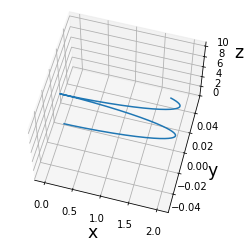

In [9]:
# Now we make the same 3-d plot

#  Make your 3-d trajectory plot here
fig = plt.figure() 
ax = plt.gca(projection='3d')

# Access the particle positions here
particle_positions = np.array(charged_particle.x_vals)
print(particle_positions.shape)                     
ax.plot(particle_positions[:,0], particle_positions[:,1], particle_positions[:,2])

ax.set_xlabel('x',fontsize='xx-large')
ax.set_ylabel('y',fontsize='xx-large')
ax.set_zlabel('z',fontsize='xx-large')
ax.view_init(60,-75)

## Runge-Kutta method:  Discuss in class
Below is a function that does the next-best-thing to the Euler method.  This is the Runge-Kutta method, that essentially uses values in between sampled points to get a better updated value.  You may remember approximating integrals (area under a curve) with right and left sum, then using the mid-point, then finally using the trapezoid method.  That is essentially what we are doing here: https://www.khanacademy.org/math/ap-calculus-ab/ab-integration-new/ab-6-2/a/riemann-sums-review

The Runge-Kutta method does the following:

- Use the acceleration due to the fields at the current position to figure out a $\vec{v}_{i+1/2}=\vec{v}_{i}+\Delta\vec{v}_{i+1/2}$, or the change in velocity over half a time-step (e.g. between timestep $i$ and timestep $i+1$).

- Use the updated velocity (over the half a time-step) to find the new particle position in half a time-step, $\vec{x}_{i+1/2}\vec{x}_i+\Delta\vec{x}_{i+1/2}$.  

- Use the electric and magnetic fields at $\vec{x}_{i+1/2}$ for a particle with velocity $\vec{v}_{i+1/2}$ to calculate the half time-step acceleration, $\vec{a}_{i+1/2}$ that will be used to actually update the velocity for $\vec{v}_{i+1}$.  We also use the half time-step velocity $\vec{v}_{i+1/2}$ to update the position for $\vec{x}_{i+1}$.

In [10]:
def get_rates_of_change_runge_kutta(particle_position, particle_velocity, electric_field_function,
                                        magnetic_field_function, q, m, dt) :
    ''' This uses the Runge-Kutta method to calculate the updated values.  
    
    This method relies on mid-points. Note, this method uses the same arguments and has the same output types as 
    get_rates_of_change_euler.
    
    '''

    current_velocity, current_acceleration = cp.get_rates_of_change_euler(particle_position, particle_velocity, electric_field_function,
                                        magnetic_field_function, q, m, dt)
    
    mid_particle_velocity = current_velocity + current_acceleration * dt/2
    mid_particle_position = particle_position + mid_particle_velocity * dt/2
    
    # Calculate the acceleration due to the electric and magnetic fields at the mid_particle_position
    runge_kutta_velocity, runge_kutta_acceleration = cp.get_rates_of_change_euler(mid_particle_position, mid_particle_velocity,
                                                                        electric_field_function,
                                                                        magnetic_field_function, q, m, dt)
    return runge_kutta_velocity, runge_kutta_acceleration

Below we look at the call signature of `get_rates_of_change_euler`.  Take a look at how this compares with `get_rates_of_change_runge_kutta`, defined above.  Quick note, the function above makes use of `get_rates_of_change_euler`, defined in the `cp` module.

In [11]:
help(cp.get_rates_of_change_euler)

Help on function get_rates_of_change_euler in module charge_particle_in_fields:

get_rates_of_change_euler(particle_position, particle_velocity, efield_function, bfield_function, q, m, dt)
    Use Euler's method to calculate the rates of change of particle motion in an 
    electric and/or magnetic field



### Use the Runge-Kutta function

Create another instance of a charged particle with name `charged_particle_rk` whose initial state is teh same as `charge_particle`.  Now, evolve `charged_particle_rk` for the same number of timesteps and `dt`, but use `get_rates_of_change_runge_kutta` as the `rate_of_change_method`.

In [12]:
# Define the instance charged_particle here, with the same inputs as you used for the preflight and time evolve.
### BEGIN SOLUTION
charged_particle_rk = cp.ChargedParticle(1,1,x0=np.array([0,0,0]), v0=np.array([0,0,0]),
                                      efield_method=eb_methods.constant_electric_field,
                                      bfield_method=eb_methods.constant_magnetic_field)
charged_particle_rk.evolve_particle(1000, 0.01, rate_of_change_method=get_rates_of_change_runge_kutta)
### END SOLUTION
print(len(charged_particle_rk.v_vals))

1000


In [13]:
"""Execute to check you're on the right track"""
assert(np.abs(np.linalg.norm(charged_particle_rk.x_vals[-1]) - 10.686) < 0.01)

### Make the 3-d trajectory plot again (2 points)

Plot the 3-d trajectory for `charged_particle_rk`.  You should only need to change one line from the previous plot, and you will notice that there is no perceptible difference in the visual trajectories.

(1000, 3)


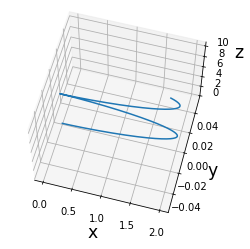

In [14]:
# Now we make the same 3-d plot

#  Make your 3-d trajectory plot here
fig = plt.figure() 
ax = plt.gca(projection='3d')

# Access the particle positions here
particle_positions = np.array(charged_particle_rk.x_vals)
print(particle_positions.shape)                     
ax.plot(particle_positions[:,0], particle_positions[:,1], particle_positions[:,2])

ax.set_xlabel('x',fontsize='xx-large')
ax.set_ylabel('y',fontsize='xx-large')
ax.set_zlabel('z',fontsize='xx-large')
ax.view_init(60,-75)

### Calculate the kinetic energy (3 points)

Calculate the kinetic energy of `charged_particle` and `charged_particle_rk`, `ke_charged_particle_rk` and `ke_charged_particle` respectively.  Hint: You may find it useful to have the particle velocities as an array (lists can be "turned into" arrays) and the `np.linalg.norm` function may be useful to you.

In [15]:
# Define ke_charged_particle and ke_charged_particle_rk
### BEGIN SOLUTION
ke_charged_particle = 0.5 * np.linalg.norm(np.array(charged_particle.v_vals), axis=1)**2
ke_charged_particle_rk = 0.5 * np.linalg.norm(np.array(charged_particle_rk.v_vals), axis=1)**2
### END SOLUTION

In [16]:
"""Execute to check you're on the right track"""
assert((ke_charged_particle[0] == 0))
assert((ke_charged_particle_rk[0] == 0))
assert(ke_charged_particle.size == len(charged_particle.v_vals))
assert(ke_charged_particle.size == charged_particle.timesteps.size)
### BEGIN HIDDEN TESTS
assert(np.abs(ke_charged_particle[-1]-1.94) < 0.01)
assert(np.abs(ke_charged_particle_rk[-1]-1.844)<0.01)
### END HIDDEN TESTS

### Plot the kinetic energy over time (3 points)

Plot on three axes: 
- The kinetic energy of `charged_particle`, whose trajectory calculation used the Euler method, as a function of time, 
- The kinetic energy of `charged_particle_rk`, whose trajectory calculation used the Runge-Kutta method, as a function of time, 
- The ratio between the second to the first. 

You'll notice a dip in the last one - this is because values are close to zero, and one is much closer to zero than the other at the same timestep.  I suggest trying to set the y axis of the third axis to logscale and to try plotting every 5 points.  If you have an array, `test_array = np.arange(10)`, then `test_array[::5]` gives you `np.array([0,5])`.  Array slicing has the form of `start:stop:step`.  Note, `test_array[1::5]` gives you `np.array([1,6])`.  


Full credit for labeled and legible axes.

In [17]:
# Example showing the step of array slicing
test_array = np.arange(10)
print(test_array[::5])
print(test_array[1::5])

[0 5]
[1 6]


<ipython-input-18-809e53306bf0>:8: RuntimeWarning: invalid value encountered in true_divide
  ax3.plot(charged_particle.timesteps[::5], ke_charged_particle_rk[::5]/ke_charged_particle[::5])


Text(0.5, 0, 'Time (s)')

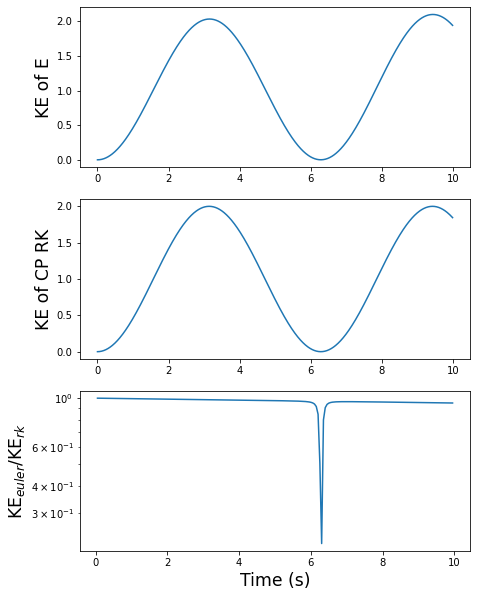

In [18]:
# Make your three axis plot here
### BEGIN SOLUTION
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(7,10))
ax1.plot(charged_particle.timesteps, ke_charged_particle)
ax1.set_ylabel("KE of E", fontsize='xx-large')
ax2.plot(charged_particle_rk.timesteps, ke_charged_particle_rk)
ax2.set_ylabel("KE of CP RK", fontsize='xx-large')
ax3.plot(charged_particle.timesteps[::5], ke_charged_particle_rk[::5]/ke_charged_particle[::5])
ax3.set_ylabel("KE$_{euler}$/KE$_{rk}$", fontsize='xx-large')
ax3.set_yscale('log')
ax3.set_xlabel('Time (s)', fontsize='xx-large')
### END SOLUTION

### Talk through the figure (2 points)

Talk through the figure in the space below as though you were writing a caption.  You'll notice that even outside of the spike, the ratio of the kinetic energies is not quite 1:1.  Incorporate what you know about the different methods to calculate the positions and velocities at the next timestep (Euler vs. Runge-Kutta). (Hint: One is more accurate than the other.)

You'll notice that the kinetic energy is cyclical, with the particle coming to a stop at the bottom point of the cycloid motion.  Both particle energies are close, but the former begins to have relatively less energy as time goes on.  Kinetic energy is "lost" due to inaccuracies from timestepping.

Also, this might be a good time to qualitatively walk through the particle's behavior (cycloid). There is no magnetic force at $t=0$ since the charge starts at rest.  The electric force accelerates the charge along the x-axis, leading to a non-zero velocity in the next timestep. The particle now has a velocity in the x-direction, perpendicular to the y-direction of the magnetic field, leading to a magnetic force that first accelerates the particle in the z-direction, then continues to rotate the particle in the xz plane about a center on the z axis.  

The magnetic force though draws the charged particle away from x-axis along a curved path. The force due to the magnetic field is opposed by the force from the electric field in the x-direction. The velocity of charged particle ultimately reduces to zero at z-axis. This cycle forms a cycloid motion, similar to a point on a bicycle wheel that is rolling without slipping.

Text(0.5, 1.0, 'Cycloid motion')

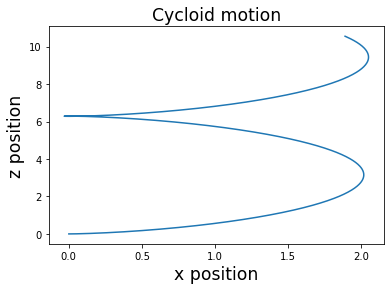

In [66]:
# Example plot
plt.plot(np.array(charged_particle.x_vals)[:,0], np.array(charged_particle.x_vals)[:,2])
plt.xlabel('x position',fontsize='xx-large')
plt.ylabel('z position',fontsize='xx-large')
plt.title('Cycloid motion',fontsize='xx-large')

##  Homework:  Particle trajectory in different fields (10 points total)

- A brief introduction to lambda functions
- Particle in a parallel E and B field (4 points total)
- The velocity filter (2 points)
- Motion in non-uniform magnetic field (2 points)
- Energy comparison (2 points)

 ### Using lambda functions (a short cut... sort of)

For new E and B field configurations, we need to have the appropriate functions to provide as parameters to the `ChargedParticle` class (i.e. the kwargs `efield_method` and `bfield_method`.  We actually have two options here.  We can either keep adding new functions in the `electric_and_magnetic_fields` module, or we can shorthand with a [lambda function](https://realpython.com/python-lambda/). See the link for more details and/or take a look at the following examples. 

An example of this would be replacing `eb_methods.constant_electric_field` with `lambda x : np.array([1,0,0])`.  You can swapping the two in the tutorial above.  Note - the tests will fail, but you can still make the figure.  Switch back to `eb_methods.constant_electric_field` after you try it out.

Another example of this from the preflight would be to replace the original function definition of `linearly_increasing_bfield` with 
```
linearly_increasing_bfield = lambda x : np.array([0,0,0.1*x[2]])
```

In the latter case, we have given a name to the lambda function.  In the former, the lambda function has the name `efield_method` when used in the class.  Below is an example use of the latter.

In [19]:
#  Example use of a lambda function
linearly_increasing_bfield = lambda x : np.array([0,0,0.1*x[2]])

linearly_increasing_bfield(np.array([5,6,7]))

array([0. , 0. , 0.7])

### Parallel E and B fields (1 points)

You already have a constant electric field function pointing in the x direction.  You will now need a constant magnetic field that is `np.array([1,0,0])`.

Next, create an instance of the `ChargedParticle` class with name `cp_in_parallel_fields` with the appropriate parameter inputs.  Everything should be the same as `charged_particle` with the exception of the magnetic field method (use a lambda function) and an initial velocity to be perpendicular to both fields, i.e. `v0=np.array([0,1,0])`.  Time evolve as before with 10000 timesteps, a `dt` of 0.01, and use Euler's method.

In [20]:
# Define cp_in_parallel_fields here
### BEGIN SOLUTION
cp_in_parallel_fields = cp.ChargedParticle(1,1,x0=np.array([0,0,0]), v0=np.array([0,1,0]),
                                      efield_method=eb_methods.constant_electric_field,
                                      bfield_method=lambda x : np.array([1,0,0]) )
cp_in_parallel_fields.evolve_particle(10000, 0.01, rate_of_change_method=cp.get_rates_of_change_euler)
### END SOLUTION

In [21]:
"""Execute to check you're on the right track"""
assert(np.abs(np.linalg.norm(cp_in_parallel_fields.v_vals[-1]) - 100) < 0.0036)

(10000, 3)


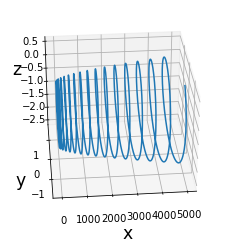

In [22]:
# Now we make the same 3-d plot
#  Make your 3-d trajectory plot here
fig = plt.figure() 
ax = plt.gca(projection='3d')

# Access the particle positions here
particle_positions = np.array(cp_in_parallel_fields.x_vals)
print(particle_positions.shape)                     
ax.plot(particle_positions[:,0], particle_positions[:,1], particle_positions[:,2])

ax.set_xlabel('x',fontsize='xx-large')
ax.set_ylabel('y',fontsize='xx-large')
ax.set_zlabel('z',fontsize='xx-large')
ax.view_init(30,-95)

### Double the fields (2 points)

Use the appropriate lambda functions to create instances of `ChargedParticle`: 
- `cp_parallel_2e_b`, where the electric field is `np.array([2,0,0])` (twice the magnitude of the magentic field
- `cp_parallel_e_2b`, where the magnetic field is `np.array([2,0,0])` (twice the magnitude of the electric field

Evolve each with the same arguments as the original case.

In [23]:
# Define the instances here
### BEGIN SOLUTION
cp_parallel_2e_b = cp.ChargedParticle(1,1,x0=np.array([0,0,0]), v0=np.array([0,1,0]),
                                      efield_method=lambda x : np.array([2,0,0]),
                                      bfield_method=lambda x : np.array([1,0,0]) )
cp_parallel_2e_b.evolve_particle(10000, 0.01, rate_of_change_method=cp.get_rates_of_change_euler)


cp_parallel_e_2b = cp.ChargedParticle(1,1,x0=np.array([0,0,0]), v0=np.array([0,1,0]),
                                      efield_method=lambda x : np.array([1,0,0]),
                                      bfield_method=lambda x : np.array([2,0,0]) )
cp_parallel_e_2b.evolve_particle(10000, 0.01, rate_of_change_method=cp.get_rates_of_change_euler)

### END SOLUTION

In [24]:
"""Execute to check you're on the right track"""
assert(np.abs(np.linalg.norm(cp_parallel_2e_b.x_vals[-1])-9997) < 0.001 )
assert(np.abs(np.linalg.norm(cp_parallel_e_2b.x_vals[-1])-4998.501) < 0.001 )

(10000, 3)
(10000, 3)
(10000, 3)


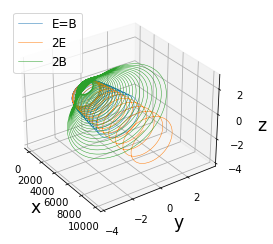

In [25]:
#  Make your 3-d trajectory plot here
fig = plt.figure() 
ax = plt.gca(projection='3d')

cparts = [cp_in_parallel_fields, cp_parallel_2e_b, cp_parallel_e_2b]
labels = ['E=B', '2E', '2B']
# Access the particle positions here
for cpart, label in zip(cparts, labels) : 
    particle_positions = np.array(cpart.x_vals)
    print(particle_positions.shape)                     
    ax.plot(particle_positions[:,0], particle_positions[:,1], particle_positions[:,2], label=label,lw=0.5)

ax.legend(fontsize='large')
ax.set_xlabel('x',fontsize='xx-large')
ax.set_ylabel('y',fontsize='xx-large')
ax.set_zlabel('z',fontsize='xx-large')
ax.view_init(30,-35)

### Talk through the figure (1 point)

Explain what happens to the particle's path as you increase E and increase B.  You may want to play around with the viewing angle.

Doubling the electric field further spreads out the windings along the x-axis.  Doubling the magnetic field increased the radius.

In this case, v and B are perpendicular, so the force is in the -z direction initially. Without an electric field, we would get circular motion in the y-z plane.  The electric field, however, provides a force to accelerate the particle in the x direction.  The resulting motion is helical with increasing distances between each helical circle (increasing pitch).

### The velocity filter

Consider a particle with charge 1 C and mass 1 kg moving with velocity $v=1\hat{x}$ m/s. If this particle enters a region with a magnetic field $B = 1\hat{y}$T, it will experience a force. You can calculate this by hand. You could then create an electric field to perfectly oppose this magnetic force. If you set up this field configuration you would have a "velocity filter."

In the cell below, instantiate charged particle objects (1 point)
- Create an instance of `ChargedParticle` with name `cp_vfilter_pass` that is instantiated with the appropriate conditions to pass through.
- Create an instance with name `cp_vfilter_fast` whose velocity is twice that of the first.
- Create an instance with name `cp_vfilter_slow` whose velocity is half that of the first.
- Time evolve all with 10 steps, dt of 0.01.

In [26]:
# Create instances of charged particles in a velocity selector
### BEGIN SOLUTION
cp_vfilter_pass = cp.ChargedParticle(1,1,x0=np.array([0,0,0]), v0=np.array([1,0,0]),
                                      efield_method=lambda x : np.array([0,0,-1]),
                                      bfield_method=lambda x : np.array([0,1,0]) )
cp_vfilter_pass.evolve_particle(10, 0.01, rate_of_change_method=cp.get_rates_of_change_euler)


cp_vfilter_fast = cp.ChargedParticle(1,1,x0=np.array([0,0,0]), v0=np.array([2,0,0]),
                                      efield_method=lambda x : np.array([0,0,-1]),
                                      bfield_method=lambda x : np.array([0,1,0]) )
cp_vfilter_fast.evolve_particle(10, 0.01, rate_of_change_method=cp.get_rates_of_change_euler)

cp_vfilter_slow = cp.ChargedParticle(1,1,x0=np.array([0,0,0]), v0=np.array([.5,0,0]),
                                      efield_method=lambda x : np.array([0,0,-1]),
                                      bfield_method=lambda x : np.array([0,1,0]) )
cp_vfilter_slow.evolve_particle(10, 0.01, rate_of_change_method=cp.get_rates_of_change_euler)
### END SOLUTION


In [46]:
"""Execute to check you're on the right track"""
assert((cp_vfilter_pass.v_vals[-1] == np.array([1,0,0])).all())
### BEGIN HIDDEN TESTS
assert(np.abs(np.linalg.norm(cp_vfilter_fast.v_vals[-1]) - 2) < 1e-2 )      
assert(np.abs(np.linalg.norm(cp_vfilter_slow.v_vals[-1]) - .5) < 1e-2 )
### END HIDDEN TESTS

### Fill out the plotting cell below (1 point)

Plot the passing particle trajectory, the fast particle, and the slow particle.  Label each "pass", "fast", and "slow".

(10, 3)
(10, 3)
(10, 3)


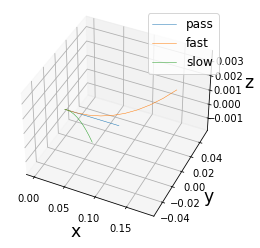

In [28]:
#  Make your 3-d trajectory plot here
fig = plt.figure() 
ax = plt.gca(projection='3d')

### BEGIN SOLUTION
cparts = [cp_vfilter_pass, cp_vfilter_fast, cp_vfilter_slow]
labels = ['pass','fast','slow']
# Access the particle positions here
for cpart, label in zip(cparts, labels) : 
    particle_positions = np.array(cpart.x_vals)
    print(particle_positions.shape)                     
    ax.plot(particle_positions[:,0], particle_positions[:,1], particle_positions[:,2], label=label,lw=0.5)
### END SOLUTION
    
ax.legend(fontsize='large')
ax.set_xlabel('x',fontsize='xx-large')
ax.set_ylabel('y',fontsize='xx-large')
ax.set_zlabel('z',fontsize='xx-large')
ax.view_init(40,-65)

### Motion in non-uniform magnetic field

For this problem the magnetic field will not be uniform, instead it is going to be changing as a function of position.  The magnetic field in cylindrical coordinates is:
\begin{equation}
 B(r,\phi,z) = - \frac {B_0} {2} r \hat{r} + (B_0z+B_1)\hat{z}
\end{equation}

That is the the magnitude of the field is changing in $z$ and $r$, but is not changing in $\phi$.  Let $B_1=1$T and $B_0=.1$T/m.

Take the electric field to be zero.

As opposed to the contrived example in the preflight, this is in fact a field that obeys Maxwell's equations. Such a field could not really fill all space... it blows up as $r\rightarrow\infty$. However, this field could exist inside a long, cylindrical coil of wire (a solenoid) where the number of turns per meter is increasing linearly. Such fields are sometimes used at particle accelerators to guide beams of charged particles.

### Rewrite the B-field in cartesian coordinates (1 point)

Use latex to rewrite this field in cartesian coordinates.

$$
   \mathbf{B} = -\frac{B_0}{2}\left(x\hat{x} + y\hat{y} - 2z\hat{z}\right) + B_1\hat{z}
$$


### Model a charged particle in this field (1 point)
- Create a `ChargedParticle` instance with name `cp_in_b_solenoid` using most of the initial conditions as before, with `x0=np.array([1,0,0])`, `v0=np.array([0,0,1])`, zero electric field and the solenoid magnetic field described above.  Time evolve with Euler over 1000 timesteps, dt=0.01.
- Create an instance `cp_in_b_solenoid_rk` and time evolve with Runge-Kutta.  BUT, first copy the function `get_rates_of_change_runge_kutta` below `get_rates_of_change_euler`.  You will need to re-import (or reload) the modules every time you make a change to the `.py` file.  But, now you can use both functions from the imported module `cp`.

In [29]:
# Define and evolve cp_in_b_solenoid and cp_in_b_solenoid_rk here
### BEGIN SOLUTION
cp_in_b_solenoid = cp.ChargedParticle(1,1,x0=np.array([1,0,0]), v0=np.array([0,0,1]),
                                      efield_method=lambda x : np.array([0,0,0]),
                                      bfield_method=lambda x : np.array([-.5*.1*x[0],-.5*.1*x[1],.1*x[2]+1]) )
cp_in_b_solenoid.evolve_particle(1000, 0.01, rate_of_change_method=cp.get_rates_of_change_euler)
cp_in_b_solenoid_rk = cp.ChargedParticle(1,1,x0=np.array([1,0,0]), v0=np.array([0,0,1]),
                                      efield_method=lambda x : np.array([0,0,0]),
                                      bfield_method=lambda x : np.array([-.5*.1*x[0],-.5*.1*x[1],.1*x[2]+1]) )
cp_in_b_solenoid_rk.evolve_particle(1000, 0.01, rate_of_change_method=get_rates_of_change_runge_kutta)
### END SOLUTION

In [30]:
"""Execute to check you're on the right track"""
assert(np.abs(np.linalg.norm(cp_in_b_solenoid.v_vals[-1]) - 1) < 5e-4)
assert(np.abs(np.linalg.norm(cp_in_b_solenoid_rk.v_vals[-1]) - 1) < 1e-6)

### Compare energy budget (2 points)

Below, plot motion of the simulated trajectories.  What is the ratio of final kinetic energies of the Euler vs. R-K calculation, `e2rk_ratio`?

(1000, 3)
(1000, 3)


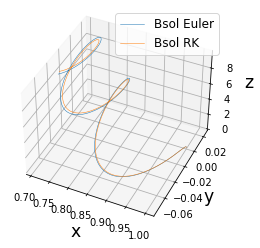

In [31]:
#  Make your 3-d trajectory plot here
fig = plt.figure() 
ax = plt.gca(projection='3d')

### BEGIN SOLUTION
cparts = [cp_in_b_solenoid, cp_in_b_solenoid_rk]
labels = ['Bsol Euler','Bsol RK']
# Access the particle positions here
for cpart, label in zip(cparts, labels) : 
    particle_positions = np.array(cpart.x_vals)
    print(particle_positions.shape)                     
    ax.plot(particle_positions[:,0], particle_positions[:,1], particle_positions[:,2], label=label,lw=0.5)
### END SOLUTION
    
ax.legend(fontsize='large')
ax.set_xlabel('x',fontsize='xx-large')
ax.set_ylabel('y',fontsize='xx-large')
ax.set_zlabel('z',fontsize='xx-large')
ax.view_init(40,-65)

In [32]:
# Calculate e2rk_ratio here
### BEGIN SOLUTION
e2rk_ratio = np.linalg.norm(cp_in_b_solenoid.v_vals[-1])**2/np.linalg.norm(cp_in_b_solenoid_rk.v_vals[-1])**2
### END SOLUTION

In [33]:
"""Execute to check you're on the right track"""
assert(e2rk_ratio - 1 < .000968)